In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, PolynomialFeatures
from sklearn.linear_model import LinearRegression, PoissonRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_squared_log_error
from sklearn.linear_model import Lasso
from sklearn.compose import TransformedTargetRegressor


from sklearn import set_config
set_config(transform_output='pandas')

In [2]:
df = pd.read_csv('../data/csv/cleaned_data.csv')

## Train-Test Split

In [3]:
numerical_features = ['Floor Area','Lot Area']
categorical_features = ['Town/City','Region','Bedrooms']
features = numerical_features + categorical_features
target_variable = 'Price'

In [4]:
# feature and target columns
X,y = df[features],df[target_variable]

In [5]:
X.head()

,Floor Area,Lot Area,Town/City,Region,Bedrooms
0,222,96,Las Piñas,Metro Manila,4
1,189,120,Las Piñas,Metro Manila,4
2,128,120,Las Piñas,Metro Manila,4
3,216,105,Las Piñas,Metro Manila,4
4,120,85,Las Piñas,Metro Manila,4


In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)
X_train.shape, X_test.shape

((1152, 5), (289, 5))

## Feature Engineering
- Categorical features: Convert to binary columns by using One Hot Encoding
- Numerical features: Normalize by using StandardScaler

In [14]:
numerical_transformer = Pipeline(
    steps=[
        ('scaler', StandardScaler()),
        ('polynomial', PolynomialFeatures(degree=3))
    ]
)

In [15]:
categorical_transformer = Pipeline(
    steps=[
        ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False,drop='first'))
    ]
)

In [16]:
# Create a column transformer for categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

In [17]:
# Create a Pipeline that includes the preprocessor and the LinearRegression model
model = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ]
)

In [18]:
# transform price to log to make it more normally distributed
y_train_log = np.log1p(y_train)

In [19]:
# fit model
model.fit(X_train, y_train_log)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('polynomial',
                                                                   PolynomialFeatures(degree=3))]),
                                                  ['Floor Area', 'Lot Area']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Town/City', 'Region',
                                                   'Bedrooms'])])),
                ('regressor', LinearRegression())])

In [20]:
# training score
training_score = model.score(X_train, y_train_log)

# test score
y_test_log = np.log1p(y_test)
test_score = model.score(X_test, y_test_log)

# print r2 score
print('Training score: ', training_score)
print('Test score: ', test_score)

Training score:  0.9075082629462388
Test score:  0.9097165303544278


In [21]:
# Make predictions using the model
y_pred_log = model.predict(X_train)

# Transform the predictions back to the original scale using expm1
y_pred = np.exp(y_pred_log)-1

In [22]:
train_mean_sq_error_val = np.sqrt(mean_squared_error(y_train_log, y_pred_log))
print("Train MSE: %.2f" % train_mean_sq_error_val)

Train MSE: 0.30


In [23]:
# predict test data
# Make predictions using the model
y_test_pred_log = model.predict(X_test)

y_test_pred = np.exp(y_test_pred_log)-1

test_mean_sq_error_val = np.sqrt(mean_squared_error(y_test_log, y_test_pred_log))
print("Test MSE: ", test_mean_sq_error_val)

Test MSE:  0.30046419420412274


In [27]:
from sklearn.metrics import mean_squared_log_error

np.sqrt(mean_squared_log_error(y_train, y_pred))

0.29545732883754344

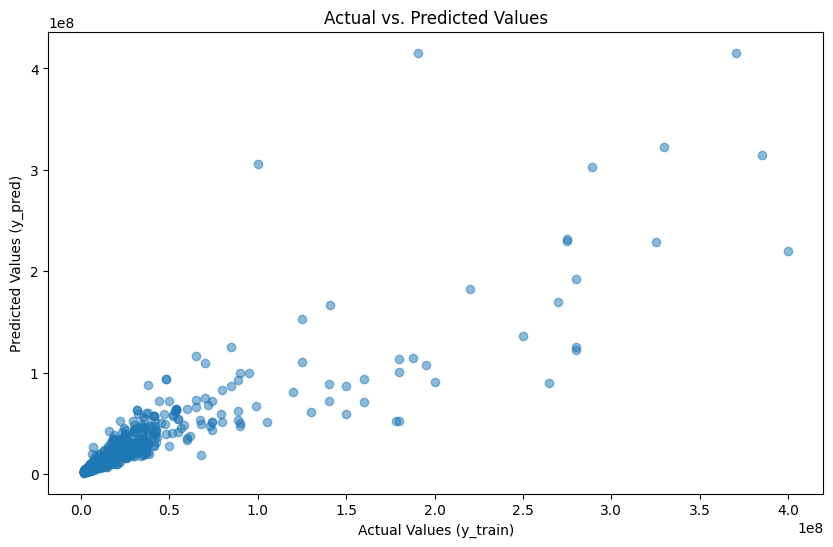

In [30]:
import matplotlib.pyplot as plt


# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred, alpha=0.5)
plt.xlabel('Actual Values (y_train)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs. Predicted Values')
plt.show()


In [ ]:
# Get r2 score
print(f'Train r2 score: {r2_score(y_train, y_pred)}')
print(f'Test r2 score: {r2_score(y_test, y_test_pred)}')


In [ ]:
difference = abs(y_train_log - y_pred_log)
# Create a DataFrame with y_train_log and y_pred_log
results_df_log = pd.DataFrame({'y_train_log': y_train_log, 'y_pred_log': y_pred_log, 'difference': difference})

# Display the DataFrame
results_df_log.head()

In [ ]:
# Calculate the absolute difference between y_train and y_pred
difference = abs(y_train - y_pred.astype(int))

# Create a DataFrame with y_train and y_pred
results_df = pd.DataFrame({'y_train': y_train, 'y_pred': y_pred.astype(int), 'difference': difference})

# Display the DataFrame
results_df.head()

In [ ]:
x = 5039190
x_log = np.log1p(x)
x_inverse_log = np.exp(x_log)-1

print(f'x_log: {x_log}')
print(f'x_inverse_log: {x_inverse_log}')

In [ ]:
# andrew ang